In [6]:
import pickle as pk
import matplotlib.pyplot as plt
import tensorflow as tf
from cnn import CNN
import numpy as np
model_filepath="../models/vanilla"
model = tf.keras.models.load_model(model_filepath, custom_objects={"loss": CNN.loss})

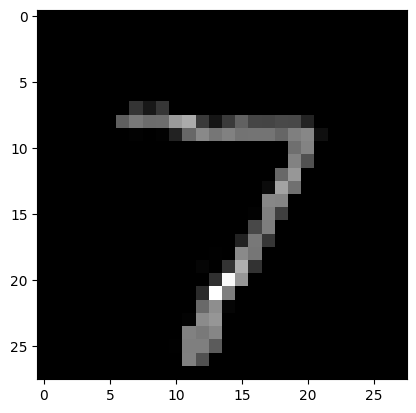

In [7]:
input_filepath="../data/test.pk"
output_filepath="../fig/test.png"
with open(input_filepath, "rb") as fd:
    xp = pk.load(fd)
xp = tf.reshape(xp, [1, 28, 28, 1])
plt.imshow(xp[0], cmap='gray')
plt.show()

7


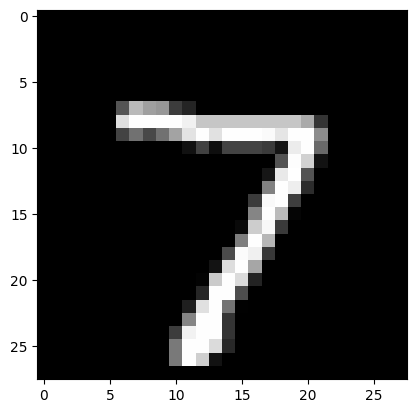

In [8]:
index = 0
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = (x_train / 255) - 0.5
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = (x_test / 255) - 0.5
x_test = np.reshape(x_test, (-1, 28, 28, 1))
print(y_test[index])
plt.imshow(x_test[index], cmap='gray')
plt.show()

In [9]:
pred = model.predict(x_test)
pred = tf.nn.softmax(pred, axis=1)
pred = np.argmax(pred, axis=1)
print(f"pred {pred}")
print(f"truth {y_test}")

313/313 [==============================] - 2s 5ms/step
pred [7 2 1 ... 4 5 6]
truth [7 2 1 ... 4 5 6]


In [10]:
pred = model.predict(xp)
pred = tf.nn.softmax(pred, axis=1)
pred = np.argmax(pred, axis=1)
print(f"pred {pred}")

1/1 [==============================] - 0s 17ms/step
pred [9]
